In [1]:
import seaborn as sns
%matplotlib inline

In [2]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


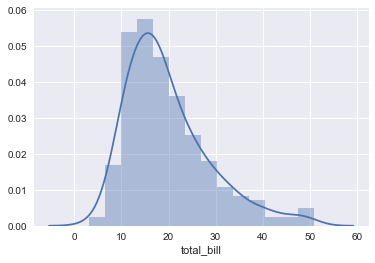

In [4]:
sns.distplot(tips['total_bill'])
# Safe to ignore warnings

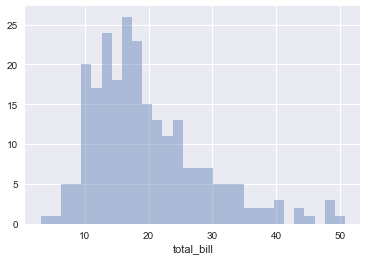

In [6]:
sns.distplot(tips['total_bill'], kde=False, bins=30)
# Safe to ignore warnings

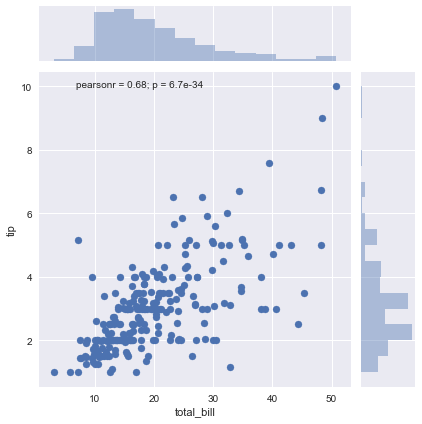

In [7]:
sns.jointplot(x='total_bill',y='tip',data=tips,kind='scatter')

jointplot() allows you to basically match up two distplots for bivariate data. With your choice of what **kind** parameter to compare with: 
* “scatter” 
* “reg” 
* “resid” 
* “kde” 
* “hex”

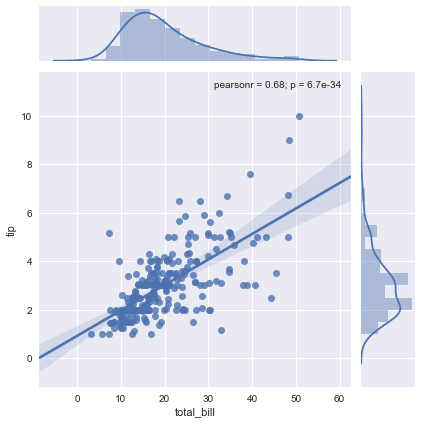

In [8]:
sns.jointplot(x='total_bill',y='tip',data=tips,kind='reg')

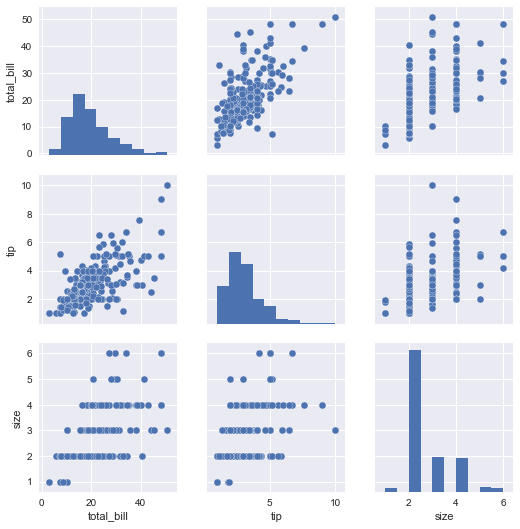

In [9]:
sns.pairplot(tips) # only for numerical cols

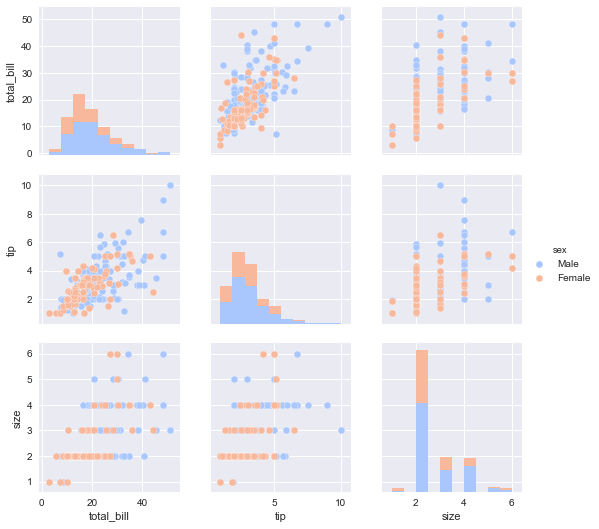

In [10]:
sns.pairplot(tips,hue='sex',palette='coolwarm')

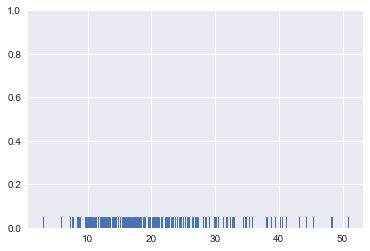

In [11]:
sns.rugplot(tips['total_bill'])

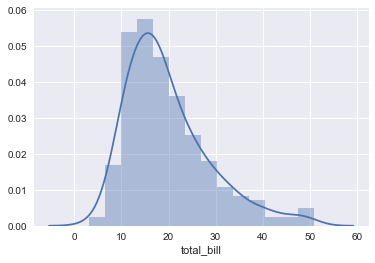

In [12]:
sns.distplot(tips['total_bill'])

(0, 1)

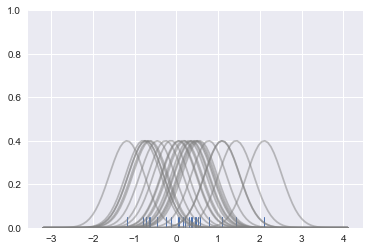

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

#Create dataset
dataset = np.random.randn(25)

# Create another rugplot
sns.rugplot(dataset);

# Set up the x-axis for the plot
x_min = dataset.min() - 2
x_max = dataset.max() + 2

# 100 equally spaced points from x_min to x_max
x_axis = np.linspace(x_min,x_max,100)

# Set up the bandwidth, for info on this:
url = 'http://en.wikipedia.org/wiki/Kernel_density_estimation#Practical_estimation_of_the_bandwidth'

bandwidth = ((4*dataset.std()**5)/(3*len(dataset)))**.2


# Create an empty kernel list
kernel_list = []

# Plot each basis function
for data_point in dataset:
    
    # Create a kernel for each point and append to list
    kernel = stats.norm(data_point,bandwidth).pdf(x_axis)
    kernel_list.append(kernel)
    
    #Scale for plotting
    kernel = kernel / kernel.max()
    kernel = kernel * .4
    plt.plot(x_axis,kernel,color = 'grey',alpha=0.5)

plt.ylim(0,1)

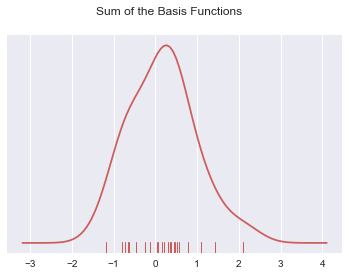

In [15]:
# To get the kde plot we can sum these basis functions.

# Plot the sum of the basis function
sum_of_kde = np.sum(kernel_list,axis=0)

# Plot figure
fig = plt.plot(x_axis,sum_of_kde,color='indianred')

# Add the initial rugplot
sns.rugplot(dataset,c = 'indianred')

# Get rid of y-tick marks
plt.yticks([])

# Set title
plt.suptitle("Sum of the Basis Functions")

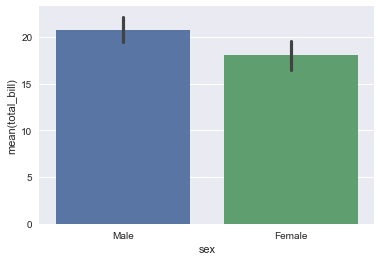

In [16]:
sns.barplot(x='sex',y='total_bill',data=tips)

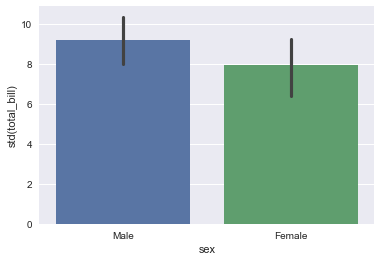

In [17]:
# Who have more variance in total bills?
sns.barplot(x='sex',y='total_bill',data=tips,estimator=np.std) #by default estimator is avg

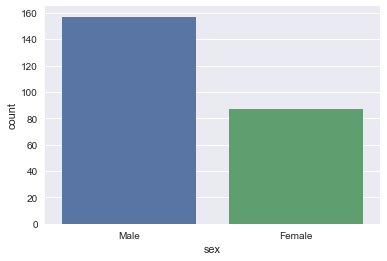

In [18]:
# This is essentially the same as barplot except the estimator is explicitly counting the number of occurrences.

sns.countplot(x='sex',data=tips)

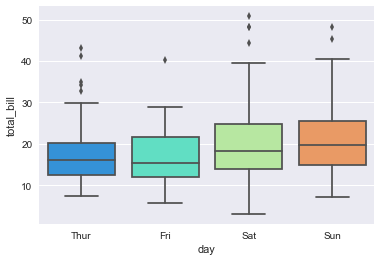

In [19]:
sns.boxplot(x="day", y="total_bill", data=tips,palette='rainbow')

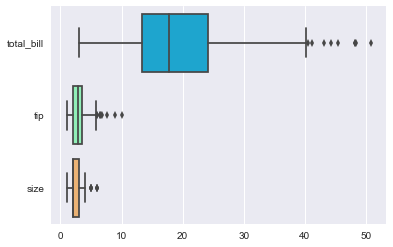

In [20]:
# Can do entire dataframe with orient='h'
sns.boxplot(data=tips,palette='rainbow',orient='h')

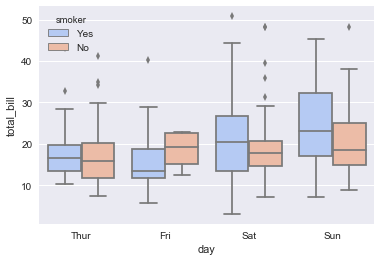

In [21]:
sns.boxplot(x="day", y="total_bill", hue="smoker",data=tips, palette="coolwarm")

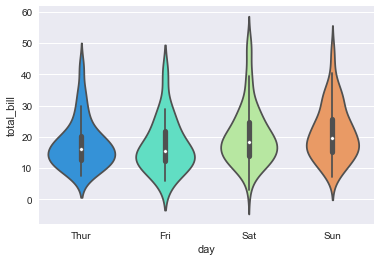

In [22]:
sns.violinplot(x="day", y="total_bill", data=tips,palette='rainbow')

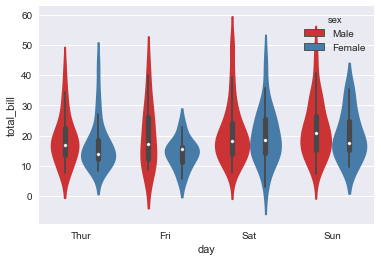

In [23]:
sns.violinplot(x="day", y="total_bill", data=tips,hue='sex',palette='Set1')

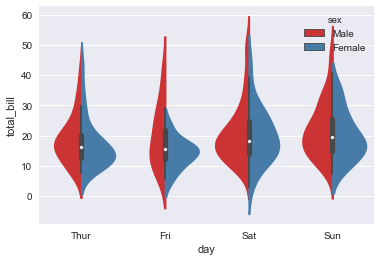

In [24]:
sns.violinplot(x="day", y="total_bill", data=tips,hue='sex',split=True,palette='Set1')

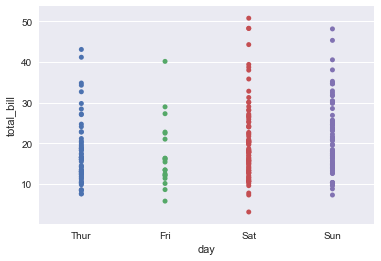

In [3]:
sns.stripplot(x="day", y="total_bill", data=tips)

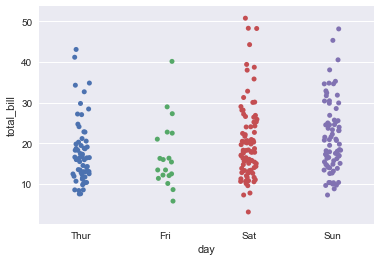

In [4]:
sns.stripplot(x="day", y="total_bill", data=tips,jitter=True)

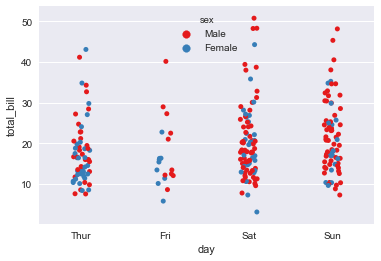

In [5]:
sns.stripplot(x="day", y="total_bill", data=tips,jitter=True,hue='sex',palette='Set1')

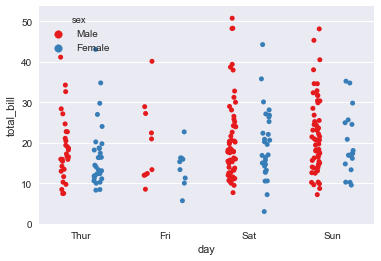

In [6]:
sns.stripplot(x="day", y="total_bill", data=tips,jitter=True,hue='sex',palette='Set1',split=True)

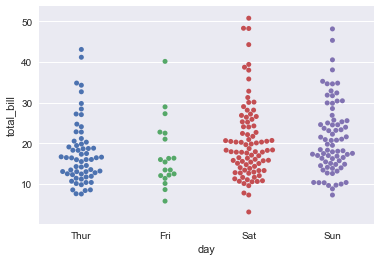

In [7]:
sns.swarmplot(x="day", y="total_bill", data=tips)

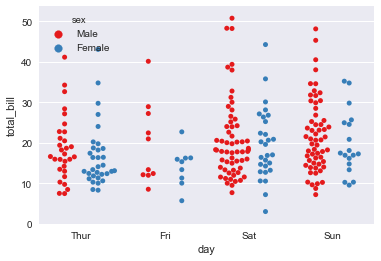

In [8]:
sns.swarmplot(x="day", y="total_bill",hue='sex',data=tips, palette="Set1", split=True)

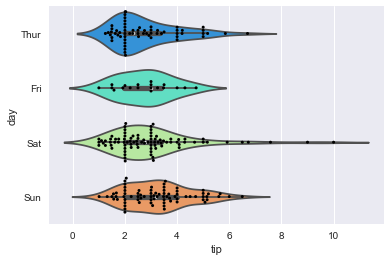

In [9]:
sns.violinplot(x="tip", y="day", data=tips,palette='rainbow')
sns.swarmplot(x="tip", y="day", data=tips,color='black',size=3)

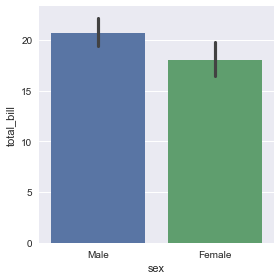

In [10]:
sns.factorplot(x='sex',y='total_bill',data=tips,kind='bar')

In [11]:
flights = sns.load_dataset('flights')

In [12]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [13]:
flights.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [14]:
tips.corr()

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


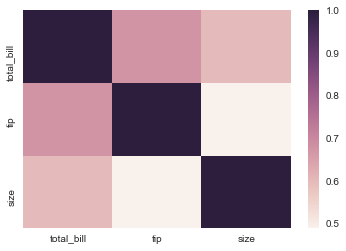

In [15]:
sns.heatmap(tips.corr())

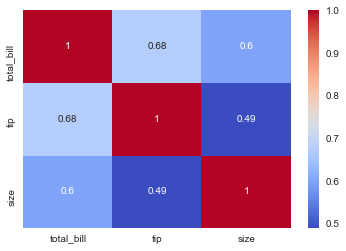

In [16]:
sns.heatmap(tips.corr(),cmap='coolwarm',annot=True)

In [17]:
flights.pivot_table(values='passengers',index='month',columns='year')

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
January,112,115,145,171,196,204,242,284,315,340,360,417
February,118,126,150,180,196,188,233,277,301,318,342,391
March,132,141,178,193,236,235,267,317,356,362,406,419
April,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
June,135,149,178,218,243,264,315,374,422,435,472,535
July,148,170,199,230,264,302,364,413,465,491,548,622
August,148,170,199,242,272,293,347,405,467,505,559,606
September,136,158,184,209,237,259,312,355,404,404,463,508


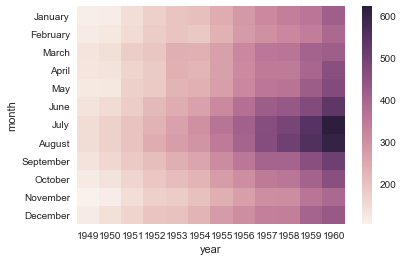

In [18]:
pvflights = flights.pivot_table(values='passengers',index='month',columns='year')
sns.heatmap(pvflights)

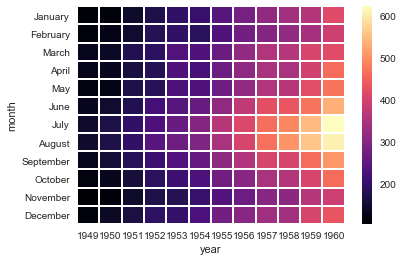

In [19]:
sns.heatmap(pvflights,cmap='magma',linecolor='white',linewidths=1)

/Users/kate/anaconda/lib/python3.6/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


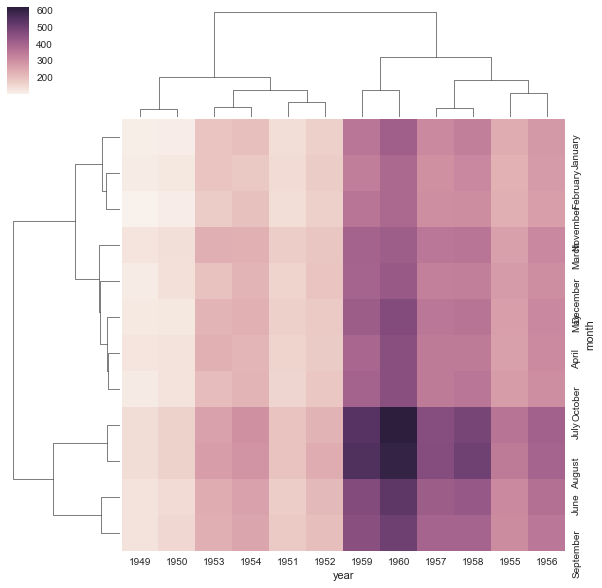

In [20]:
sns.clustermap(pvflights)

/Users/kate/anaconda/lib/python3.6/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


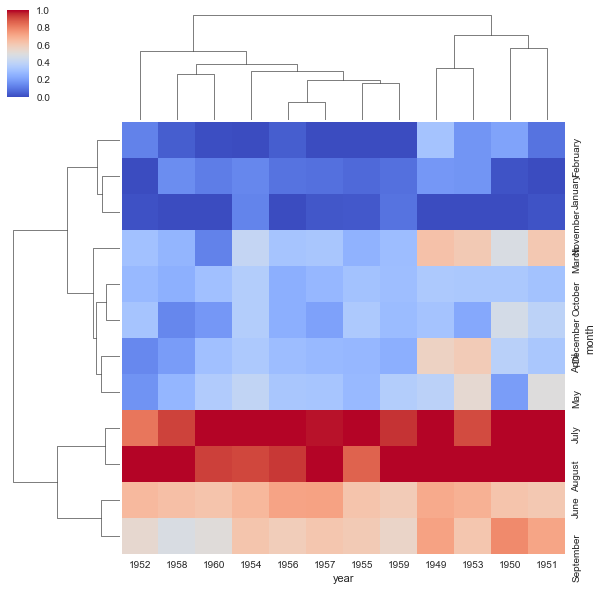

In [21]:
sns.clustermap(pvflights,cmap='coolwarm',standard_scale=1)

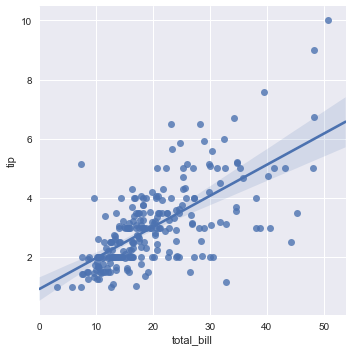

In [22]:
sns.lmplot(x='total_bill',y='tip',data=tips)

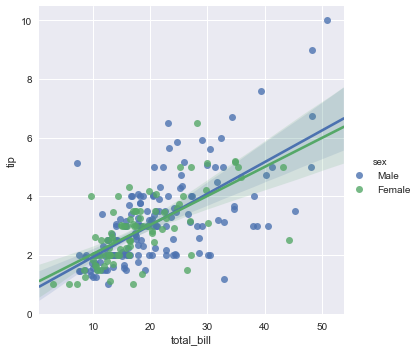

In [23]:
sns.lmplot(x='total_bill',y='tip',data=tips,hue='sex')

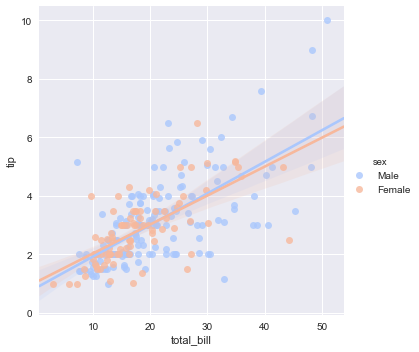

In [24]:
sns.lmplot(x='total_bill',y='tip',data=tips,hue='sex',palette='coolwarm')

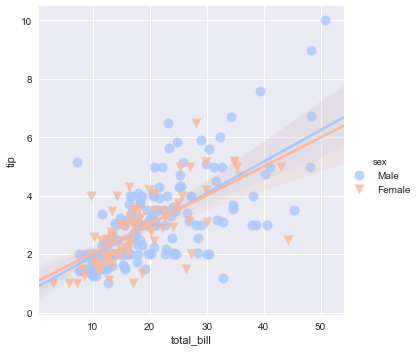

In [27]:
sns.lmplot(x='total_bill',y='tip',data=tips,hue='sex',palette='coolwarm',
           markers=['o','v'],scatter_kws={'s':100})

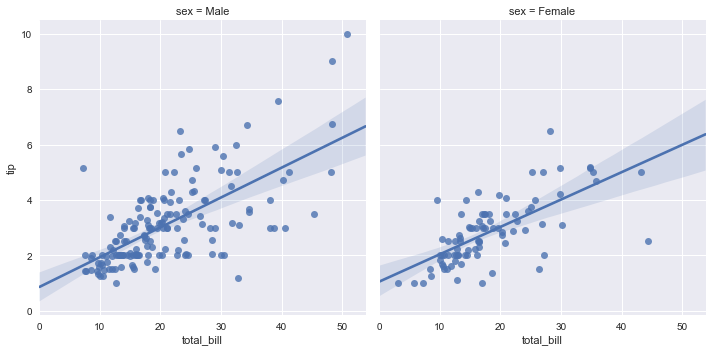

In [28]:
sns.lmplot(x='total_bill',y='tip',data=tips,col='sex')

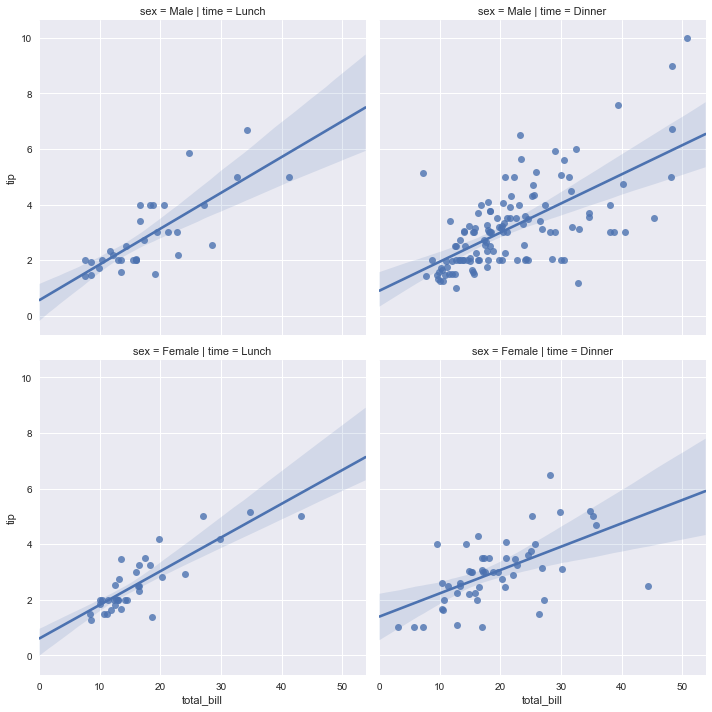

In [29]:
sns.lmplot(x="total_bill", y="tip", row="sex", col="time",data=tips)

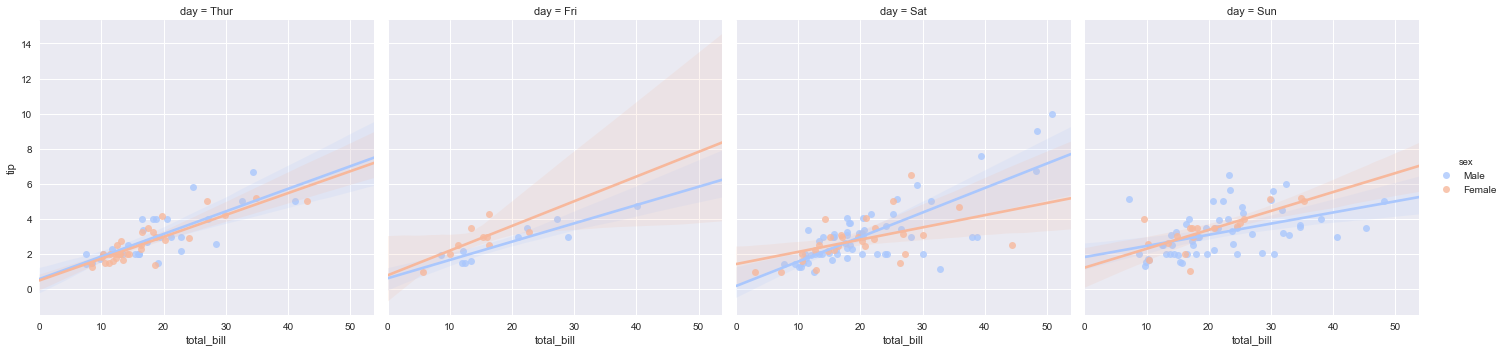

In [30]:
sns.lmplot(x='total_bill',y='tip',data=tips,col='day',hue='sex',palette='coolwarm')

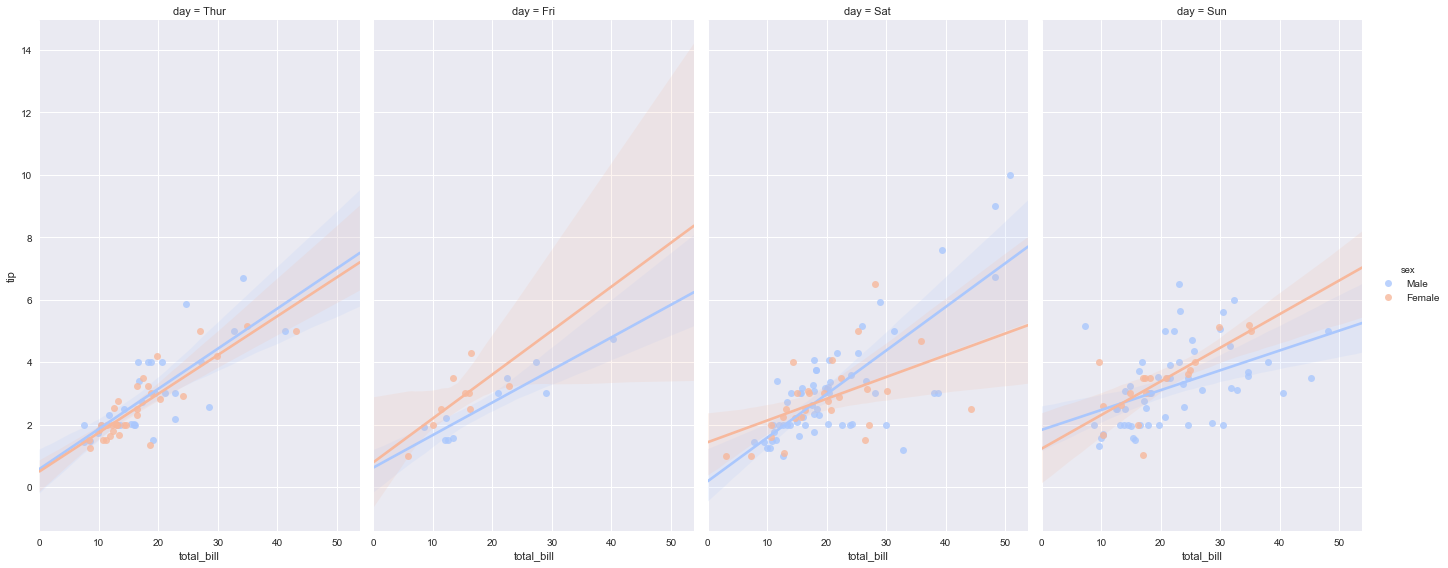

In [33]:
sns.lmplot(x='total_bill',y='tip',data=tips,col='day',hue='sex',palette='coolwarm',
          aspect=0.6,size=8) #aspect is ratio between w and h

In [35]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [36]:
iris['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

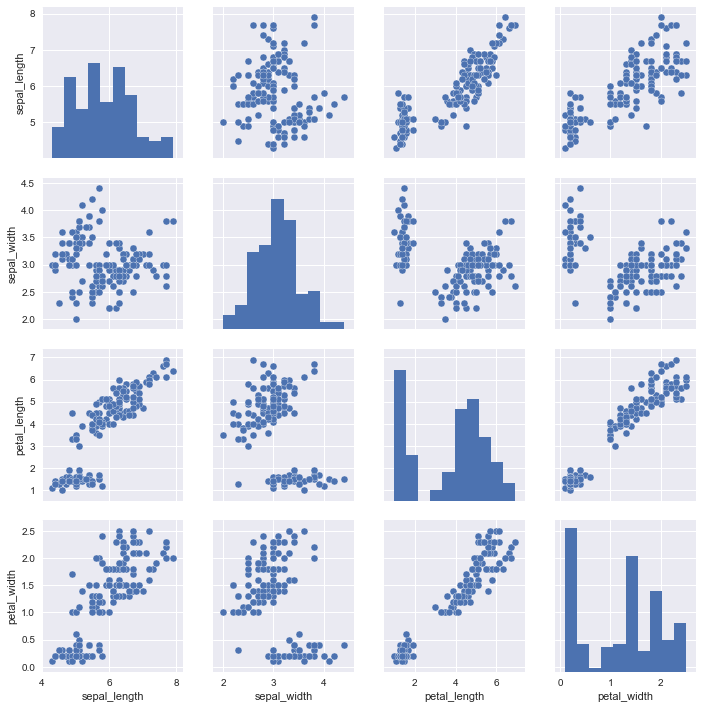

In [38]:
sns.pairplot(iris)

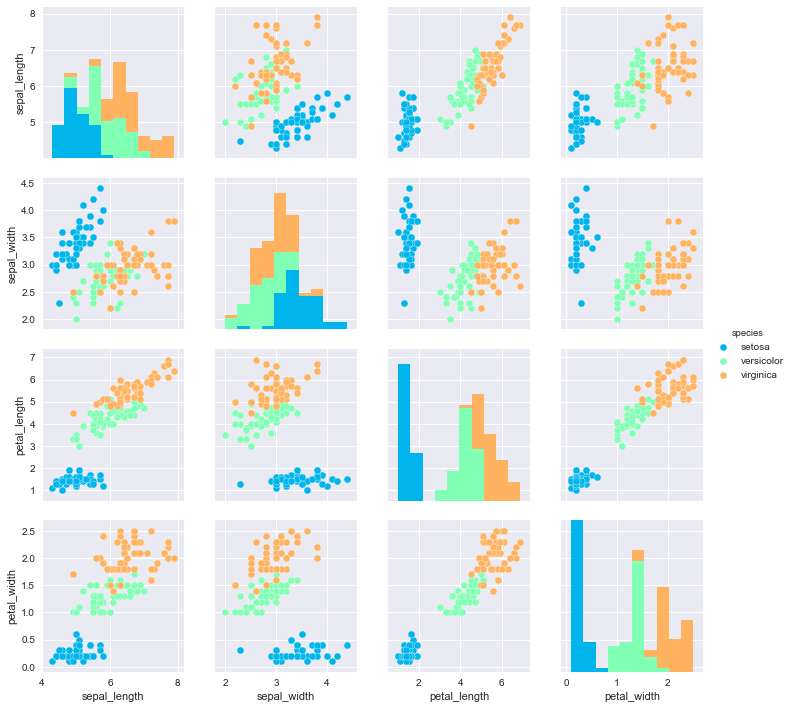

In [42]:
sns.pairplot(iris,hue='species',palette='rainbow')

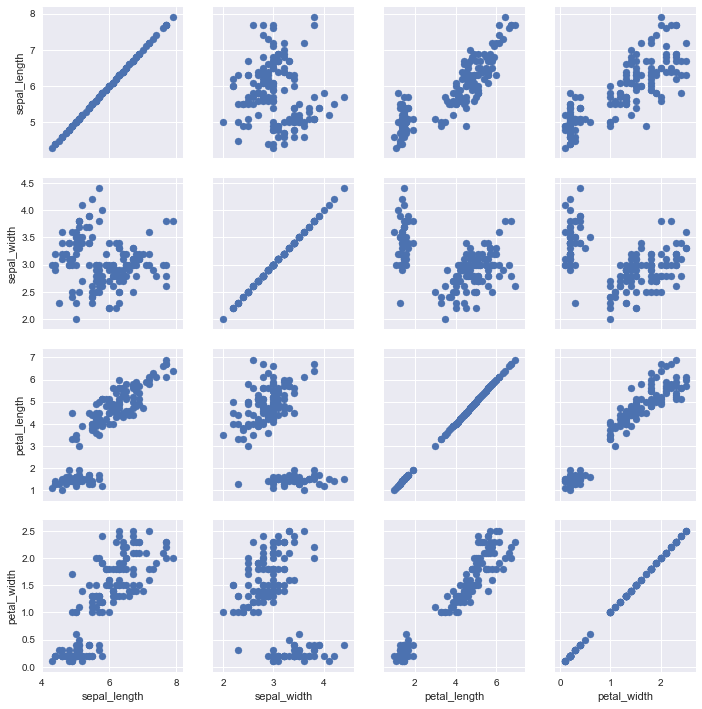

In [40]:
import matplotlib.pyplot as plt

g = sns.PairGrid(iris)
g.map(plt.scatter)

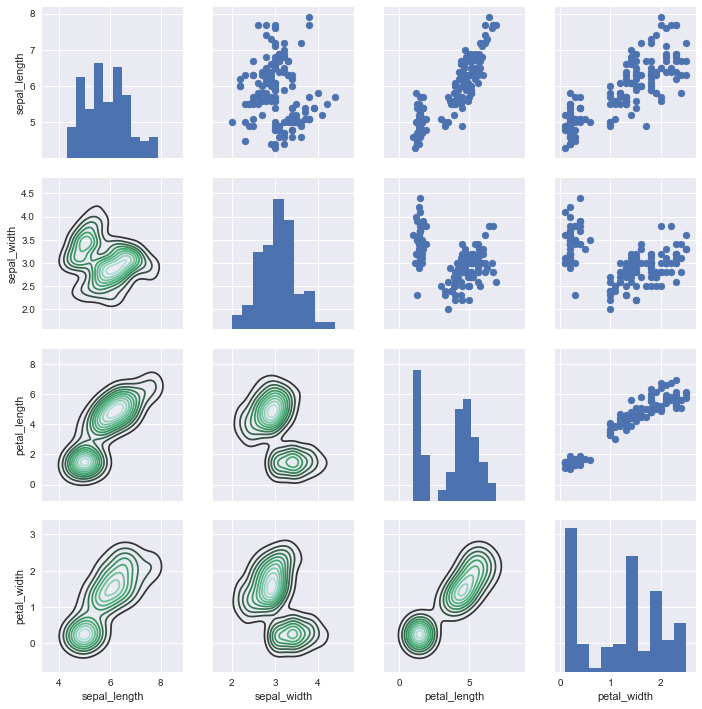

In [41]:
g = sns.PairGrid(iris)
g.map_diag(plt.hist)
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot)

In [43]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


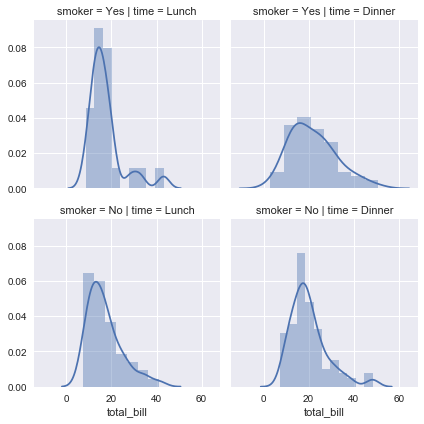

In [48]:
g = sns.FacetGrid(tips, col="time",  row="smoker")
g = g.map(sns.distplot, "total_bill")

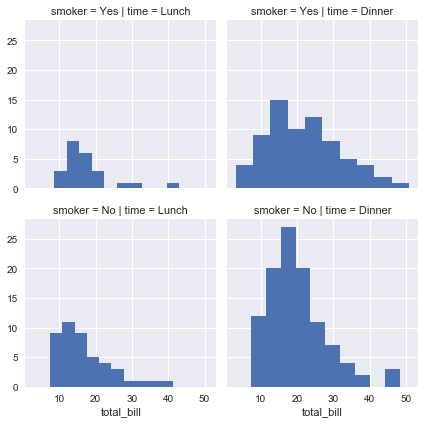

In [45]:
g = sns.FacetGrid(tips, col="time",  row="smoker")
g = g.map(plt.hist, "total_bill")

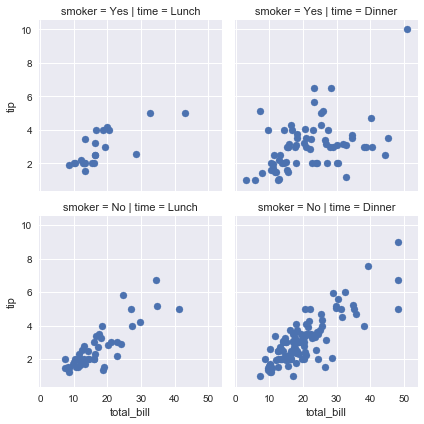

In [49]:
g = sns.FacetGrid(tips, col="time",  row="smoker")
g = g.map(plt.scatter, "total_bill", "tip")

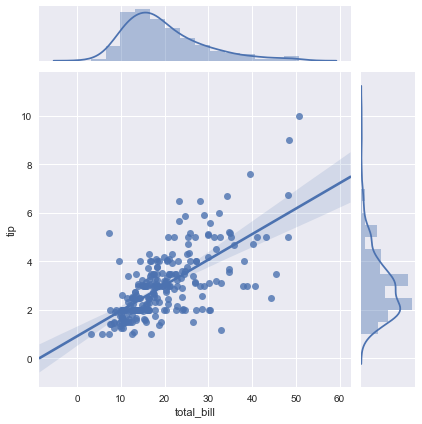

In [50]:
g = sns.JointGrid(x="total_bill", y="tip", data=tips)
g = g.plot(sns.regplot, sns.distplot)

## Styles

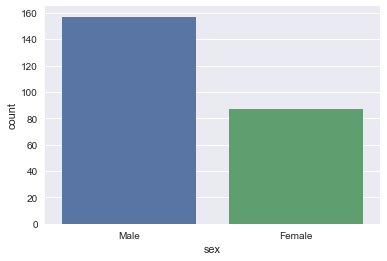

In [51]:
sns.countplot(x='sex',data=tips)

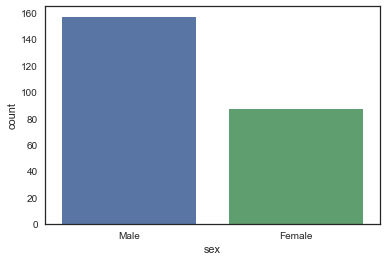

In [52]:
sns.set_style('white')
sns.countplot(x='sex',data=tips)

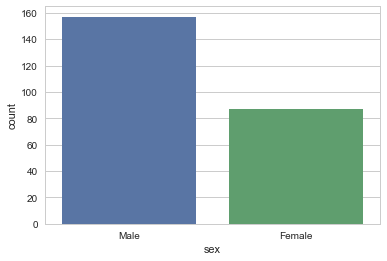

In [53]:
sns.set_style('whitegrid')
sns.countplot(x='sex',data=tips)

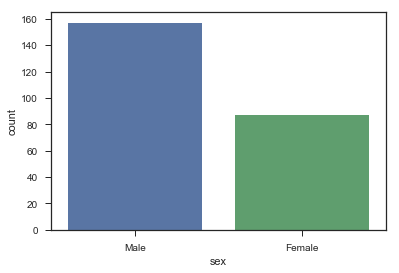

In [55]:
sns.set_style('ticks')
sns.countplot(x='sex',data=tips)

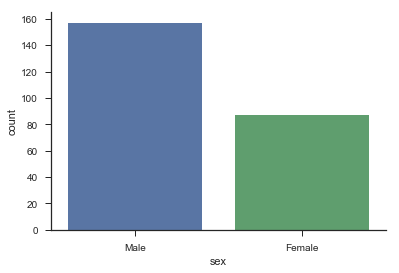

In [56]:
sns.set_style('ticks')
sns.countplot(x='sex',data=tips)
sns.despine()

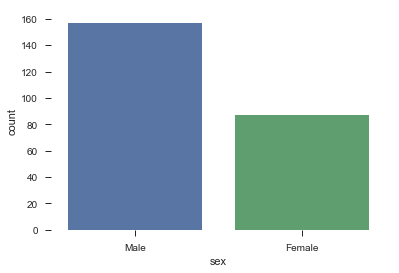

In [57]:
sns.set_style('ticks')
sns.countplot(x='sex',data=tips)
sns.despine(left=True, bottom=True)

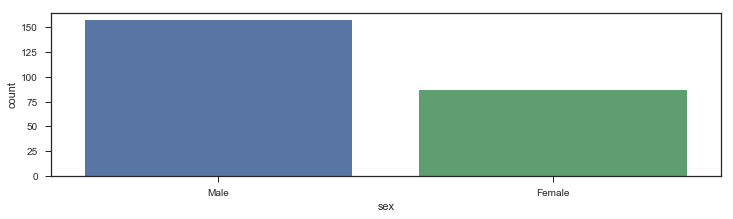

In [58]:
plt.figure(figsize=(12,3))
sns.countplot(x='sex',data=tips)

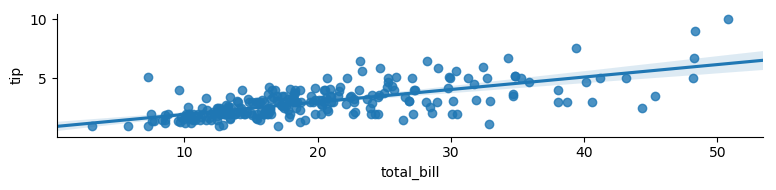

In [69]:
sns.reset_orig()

sns.lmplot(x='total_bill',y='tip',size=2,aspect=4,data=tips)

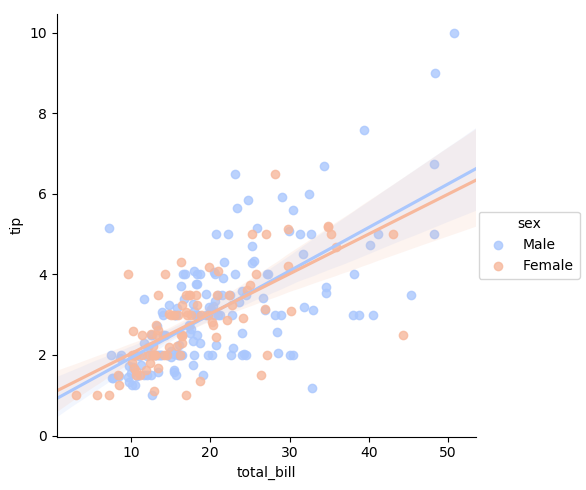

In [75]:
sns.reset_orig()
sns.lmplot(x='total_bill',y='tip',data=tips,hue='sex', palette='coolwarm')

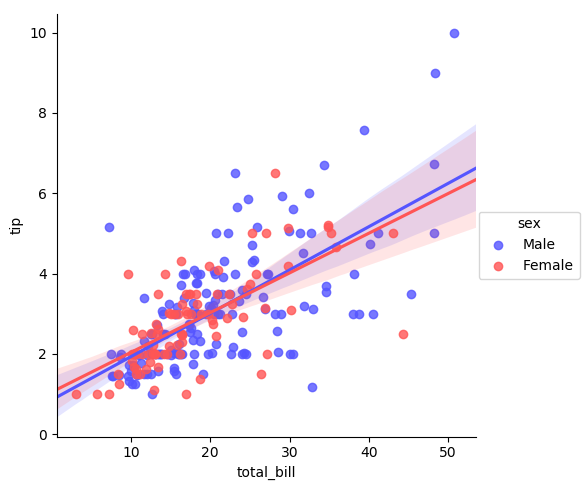

In [76]:
sns.reset_orig()
sns.lmplot(x='total_bill',y='tip',data=tips,hue='sex', palette='seismic')

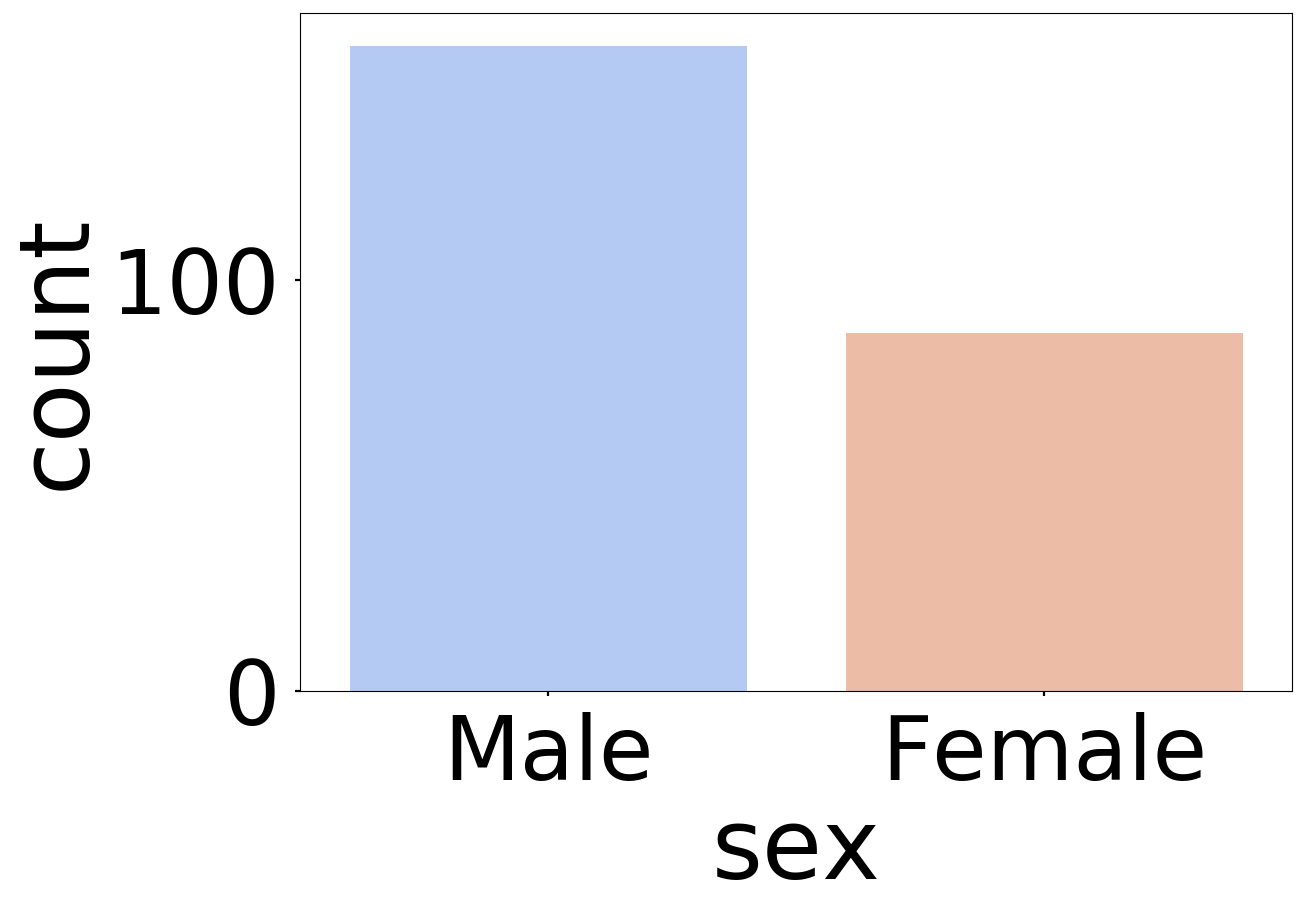

In [71]:
sns.set_context('poster',font_scale=4)
sns.countplot(x='sex',data=tips,palette='coolwarm')